# 1. Dimensionality Reduction

### 1. Principal Component Analysis (PCA)

Load Required Libraries

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display_html 
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [73]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Standarddize data first<br />
PCA requires us to standardize the data first to a unit scale with mean 0 and variance 1

In [74]:
X=iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # features
y=iris_df['class'] #target

X=StandardScaler().fit_transform(X) # scale the data
X=pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # create dataframe of scaled data
scaled_df=pd.concat([X,y],axis=1) # join scaled dataframe with target variable

# Display the two dataframes side by side
iris_df = iris_df.head().style.set_table_attributes("style='display:inline'").set_caption('Original DataFrame')
scaled_df = scaled_df.head().style.set_table_attributes("style='display:inline'").set_caption('Scaled DtaFrame')

display_html(iris_df._repr_html_()+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+scaled_df._repr_html_(), raw=True)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa
,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa


Perform PCA with 2 components

In [79]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(X) # fit and transform data with 2 Components
pca_df=pd.DataFrame(pca_fit,columns=['PC1','PC2']) # Create PCA dataframe
pca_df=pd.concat([pca_df,y],axis=1) # join pca dataframe with target variable
pca_df.head()

,PC1,PC2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Visualize PCA

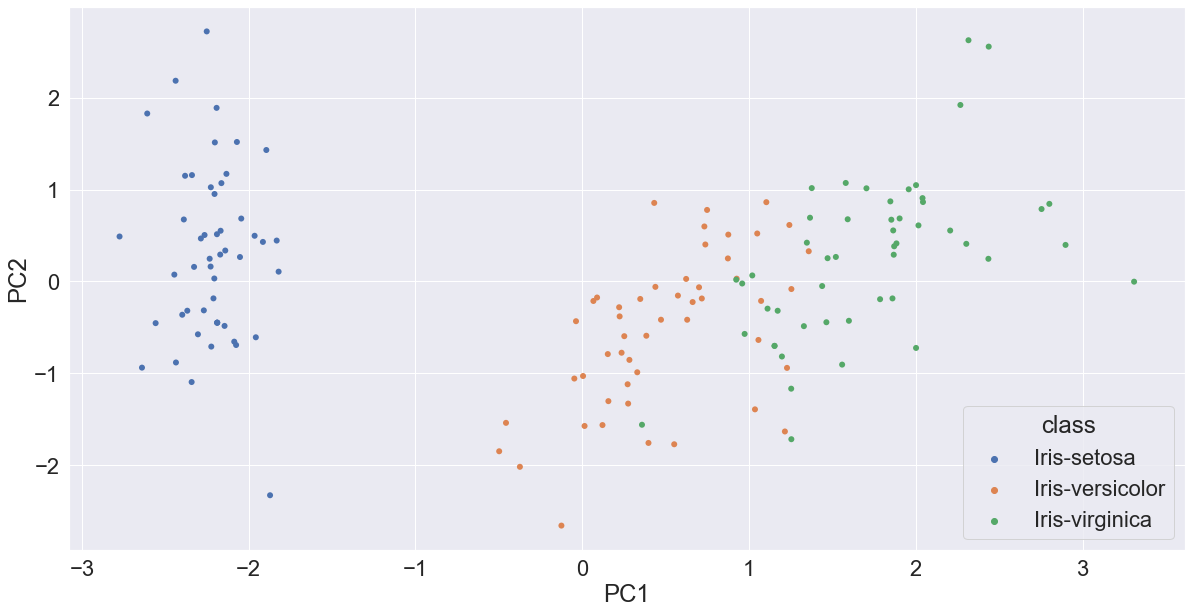

In [80]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)}) # Set figure size 

plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="PC1", y="PC2", sizes=(1, 8), linewidth=0,data=pca_df,hue='class')
plt.show()

Explained Variance<br />
Explained Variance tells us the variation in each principal component and how much information we have lost when reducing the dimensionality of the data from high-space (4 features) to low-space (2 features). Variance for teh first and second principal components

In [90]:
(pca.explained_variance_ratio_)*100

array([72.77045209, 23.03052327])

Total variance after dimensionality reduction

In [91]:
sum(pca.explained_variance_ratio_)*100

95.80097536148199